In [337]:
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
%matplotlib inline

In [301]:
from idigbio import pandas, json
j = json()

In [213]:
def sumseries(series):
    c= Counter()
    c['count'] = 0
    for s in series:
        c.update(s)
        c['count'] += 1
    return c

sumseries([{'a':1}, {'a':13}])

Counter({'a': 14, 'count': 2})

In [297]:
ssmonthly = j.stats(
    'search', date_interval='month',
    min_date='2015-07-01', max_date='2016-04-30')['dates']
sorted(ssmonthly.keys())

['2015-07-01',
 '2015-08-01',
 '2015-09-01',
 '2015-10-01',
 '2015-11-01',
 '2015-12-01',
 '2016-01-01',
 '2016-02-01',
 '2016-03-01',
 '2016-04-01']

In [306]:
ssweekly = j.stats(
    'search', date_interval='week',
    min_date='2015-06-29', max_date='2016-05-08')['dates']
len(ssweekly.keys()), min(ssweekly.keys()), max(ssweekly.keys())

(45, '2015-06-29', '2016-05-02')

In [330]:
statsbymonth = {mon: sumseries(data.values())
                for mon, data in ssmonthly.items()}
totals = sumseries(statsbymonth.values())
df = pd.DataFrame.from_dict(statsbymonth, orient='index')
dfmonth = df[['search','seen','download', 'viewed_records', 'viewed_media']]

## Stats by month

In [331]:
dfmonth

,search,seen,download,viewed_records,viewed_media
2015-07-01,510681153547,56620791,36216970,844316,35380
2015-08-01,150191776985,1554424,164335546,1844569,159294
2015-09-01,656873703499,62352551,48072809,3056466,179929
2015-10-01,471265570875,33473866,22530025,2465100,331703
2015-11-01,140262874790,2550362,2663794,5785702,775581
2015-12-01,819596616564,64832910,895372,1144401,167203
2016-01-01,163402526827,1505558,17664302,2004067,257794
2016-02-01,636392641209,43531078,368652,2097269,297396
2016-03-01,209468898311,18925149,368498,4864818,606178
2016-04-01,231915095898,1629081,1499892,941139,77341


In [315]:
dfmonth.sum()

count                      6843
search            3990050858505
seen                  286975770
viewed_media            2887799
download              294615860
viewed_records         25047847
dtype: int64

In [332]:
statsbyweek = {week: sumseries(data.values()) 
               for week, data in ssweekly.items()}
df = pd.DataFrame.from_dict(statsbyweek, orient='index')
dfweek = df[['search','seen','download', 'viewed_records', 'viewed_media']]

In [333]:
df = pd.DataFrame.from_dict(statsbyweek, orient='index')
df = df[['search','seen','download', 'viewed_records', 'viewed_media']]

## Stats by week

In [334]:
dfweek

,search,seen,download,viewed_records,viewed_media
2015-06-29,32550933360,293547,440179,611608,24287
2015-07-06,24084303784,159848,32280649,92625,7191
2015-07-13,10725967254,71377,3496053,59071,2463
2015-07-20,418603045546,55830447,89,206219,5654
2015-07-27,36781604306,369060,34160,260989,12237
2015-08-03,35438259306,232478,30875162,469984,16257
2015-08-10,24695612197,243450,86924346,263234,16381
2015-08-17,42251987774,716324,319700,470232,52914
2015-08-24,41109556390,310939,46182178,524608,67948
2015-08-31,20518074344,198997,1744165,404066,28635


In [319]:
dfweek.sum()

search            4055148058269
seen                  287481077
download              294872411
viewed_records         25532068
viewed_media            2914926
dtype: int64

##  plots

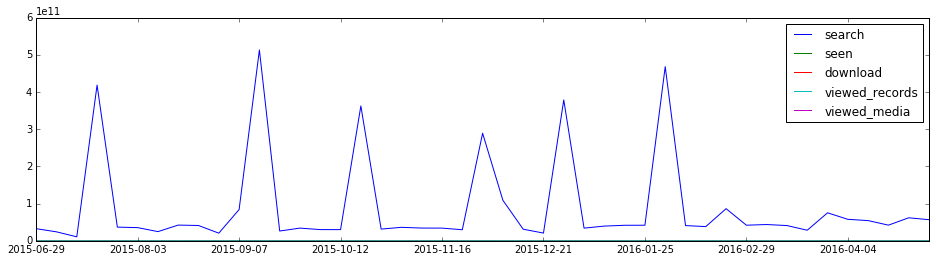

In [338]:
dfweek.plot(figsize=(16,4))

plotting all of them on one chart wasn't very useful because the search results 
is so much larger than everything else

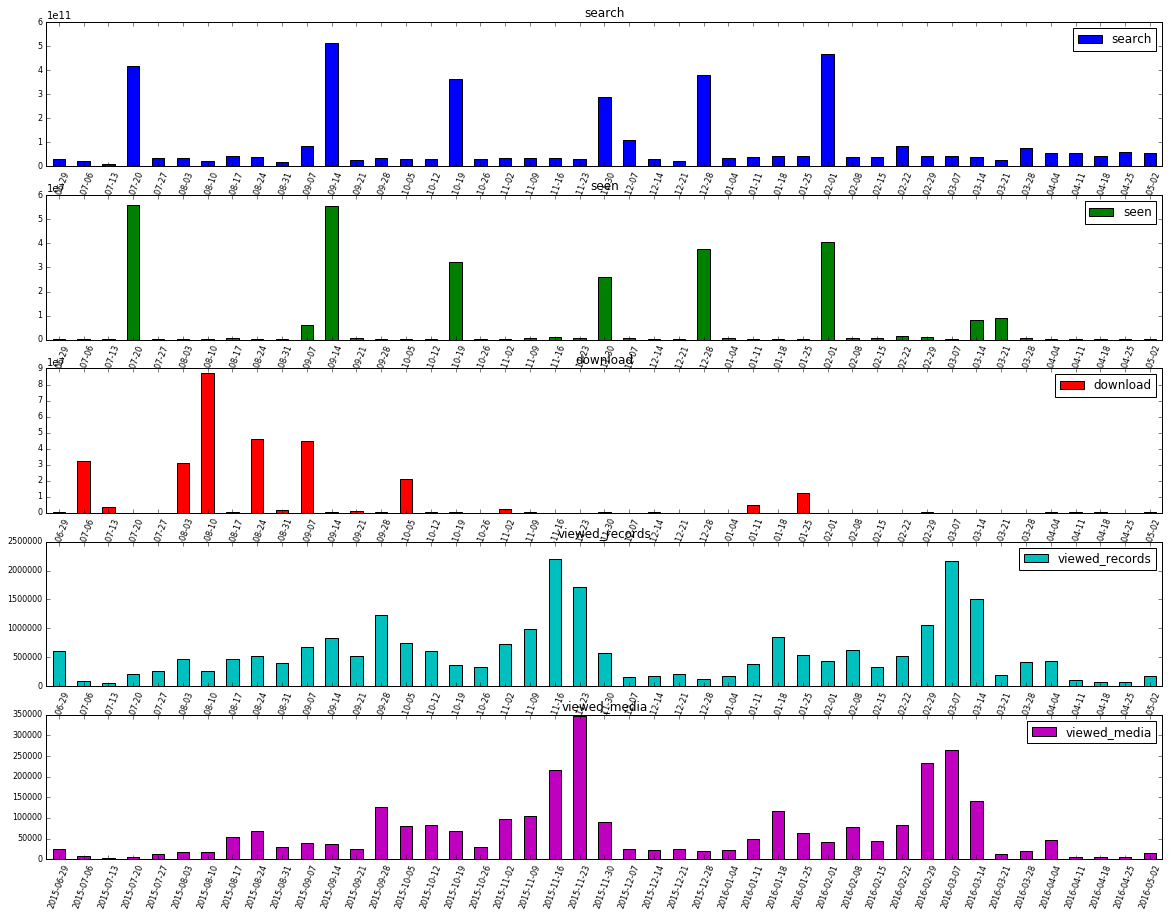

In [339]:
fig = dfweek.plot(kind='bar',
              figsize=(20,15),
              subplots=True, 
              sharex=False, 
              fontsize=8,
              rot=70,
             )

In [327]:
import pandas as pd

pd.set_option('display.notebook_repr_html', True)

def _repr_latex_(self):
    return "\centering{%s}" % self.to_latex()

pd.DataFrame._repr_latex_ = _repr_latex_  # monkey patch pandas DataFrame

In [340]:
options(jupyter.plot_mimetypes = "image/svg+xml")

SyntaxError: keyword can't be an expression (<ipython-input-340-d23a00e9eda5>, line 1)